In [100]:
# import wykorzystywanych bibliotek
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importowanie csv do ramki danych
googleplaystore = pd.read_csv('googleplaystore.csv')
googleplaystore.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [101]:
# analiza danych statystycznych
print(googleplaystore.describe())
print(googleplaystore.info())
print(googleplaystore.isnull().values.any())

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 

<AxesSubplot:>

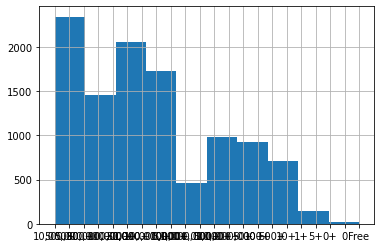

In [102]:
# rozkład płci
googleplaystore['Installs'].hist()

<AxesSubplot:>

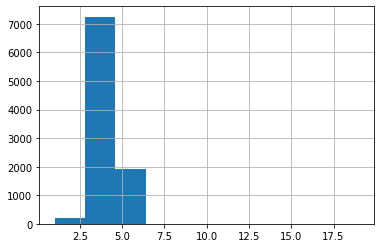

In [103]:
# rozkład "ocalałych"
googleplaystore['Rating'].hist()

In [104]:
# rozkład danych z uwzglednieniem wieku
#passengers['Age'].plot.box() 

In [105]:
#2. usuwanie nieprzydatnych danych
googleplaystore.drop(['Last Updated','App', 'Category','Size','Current Ver', 'Android Ver','Price','Type','Content Rating','Genres'], axis=1, inplace = True)
googleplaystore

,Rating,Reviews,Installs
0,4.1,159,"10,000+"
1,3.9,967,"500,000+"
2,4.7,87510,"5,000,000+"
3,4.5,215644,"50,000,000+"
4,4.3,967,"100,000+"
...,...,...,...
10836,4.5,38,"5,000+"
10837,5.0,4,100+
10838,NaN,3,"1,000+"
10839,4.5,114,"1,000+"


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (3).

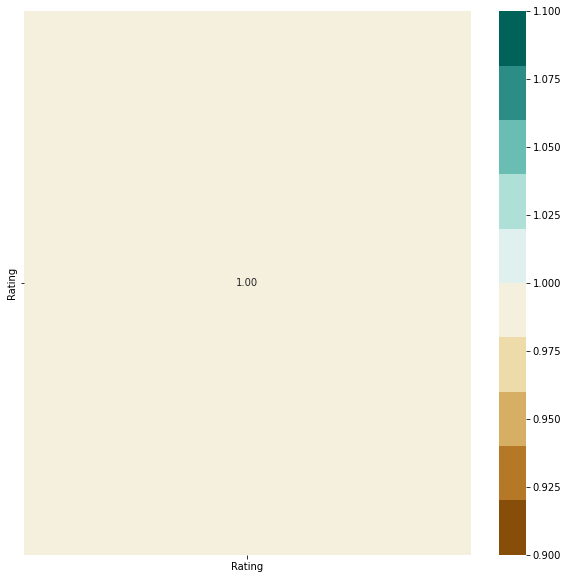

In [108]:
# wyznaczenie macierzy korelacji

correlations = googleplaystore.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(googleplaystore.columns);

plt.show()


# Variable	Definition	Key
# survival 	Survival 	0 = No, 1 = Yes
# pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
# sex 	Sex 	
# Age 	Age in years 	
# sibsp 	# of siblings / spouses aboard the Titanic 	
# parch 	# of parents / children aboard the Titanic 	
# ticket 	Ticket number 	
# fare 	Passenger fare 	
# cabin 	Cabin number 	
# embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
# uzupełnienie pustych wartości
googleplaystore.fillna(googleplaystore.mean(), inplace=True)
googleplaystoreCopy = googleplaystore.copy()

C:\Users\Waweł\AppData\Local\Temp\ipykernel_3344\3137708040.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  googleplaystore.fillna(googleplaystore.mean(), inplace=True)


In [107]:
# zbiór danych
X = googleplaystore.drop('Rating', axis=1).to_numpy()
X

array([['159', '10,000+'],
       ['967', '500,000+'],
       ['87510', '5,000,000+'],
       ...,
       ['3', '1,000+'],
       ['114', '1,000+'],
       ['398307', '10,000,000+']], dtype=object)

In [ ]:
# zbiór etykiet
y = googleplaystore.loc[:, 'Rating'].to_numpy()
y

array(['10,000+', '500,000+', '5,000,000+', ..., '1,000+', '1,000+',
       '10,000,000+'], dtype=object)

In [ ]:
# podział zbioru na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

In [ ]:
# uniwersalna metoda do trenowania i oceny modeli

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [ ]:
# MODEL 1 - regresja logistyczna 
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

ValueError: could not convert string to float: '3.0M'

In [ ]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [0.979381443298969, 0.7509881422924901, 0.8501118568232662, 0.7442748091603053]


In [ ]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.8711340206185567, 0.8325123152709359, 0.8513853904282116, 0.7748091603053435]


In [109]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

NameError: name 'accuracy_compare' is not defined

In [ ]:
# działania korygujące - zastosowanie sieci neuronowej

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.9123711340206185, 0.8119266055045872, 0.8592233009708738, 0.7786259541984732]


In [ ]:
#0.979381443298969, 0.7509881422924901, 0.8501118568232662, 0.7442748091603053]

In [ ]:
# działania korygujące - hiperparametry

# MODEL 5 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM gamma='auto'" , accuracy)

# MODEL 6 - Support Vector Machine
accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM kernel='sigmoid'" , accuracy)

# MODEL 7 - Support Vector Machine
accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM degree=4" , accuracy)

SVM gamma='auto' [0.9432989690721649, 0.7854077253218884, 0.8571428571428571, 0.767175572519084]
SVM kernel='sigmoid' [0.8041237113402062, 0.7609756097560976, 0.7819548872180451, 0.6679389312977099]
SVM degree=4 [0.979381443298969, 0.753968253968254, 0.8520179372197308, 0.7480916030534351]
